# Restaurant DataFrame

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Restaurant DataFrame
rest_df= pd.read_csv("../data/batch1_restaurants_dataset.csv")
rest_df = rest_df.drop(columns=['Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'])

cats_to_remove = ['Advertising agency', 'Art museum', 'Art studio', 'Association / Organization', 'Beauty salon',
                  'Bicycle club', 'Branding agency', 'Business management consultant', 'Candle store', 'Car dealer', 'Car wash', 'Caterer',
                  'Catering food and drink supplier', "Children's clothing store", 'Chinese Takeaway', 'Chinese language school', 'Clothing store',
                  'Coaching center', 'Coffee store', 'Condominium complex', 'Consultant', 'Corporate office', 'Curtain and upholstery cleaning service',
                  'Dance school', 'Delivery Restaurant', 'Designer Clothing Shop', 'Diving center', 'E-commerce service', 'Education center',
                  'Event management company', 'Fish store', 'Food producer', 'Food products supplier', 'Freight forwarding service', 'Fruit wholesaler'
                  'Gift shop', 'Gourmet grocery store', 'Gym and Fitness Centre', 'Hawker Stall', 'Hawker center', 'Health and beauty shop',
                  'Health food store', 'Holding company', 'Hotel', 'Housing development', 'Importer', 'Industrial Real Estate Agency', 'Industrial equipment supplier',
                  'Information services', 'Interior designer', 'Italian grocery store', 'Japanese confectionery shop', 'Jewelry store', 'Lodging',
                  'Marketing agency', 'Marketing consultant', 'Maternity store', 'Motorcycle rental agency', 'Movie rental store', 'Music producer',
                  'Pastry shop', 'Performing arts group', 'Pet Shop', 'Photography service', 'Property management company', 'Publisher', 'Real estate consultant',
                  'Recording studio', 'Religious organization', 'Restaurant supply store', 'Serviced accommodation', 'Takeaways', 'Tattoo and piercing shop',
                  'Tattoo shop', 'Tea store', 'Used clothing store', 'Video production service', 'Wellness center', 'Wellness program', 'Wine cellar', "Women's clothing store"]

cats_to_remove = [cat.lower() for cat in cats_to_remove]
mask = rest_df['main_category'].str.lower().isin(cats_to_remove)
rest_df = rest_df[~mask]


In [90]:
# Scan for duplicates
rest_df.isnull().sum()

place_id          0
name              0
reviews           0
main_category    22
categories       22
main_rating       0
address          12
link              0
review_photos     0
dtype: int64

In [91]:
rest_df['main_category'] = rest_df['main_category'].fillna('Unknown')
rest_df['categories'] = rest_df['categories'].fillna("['Unknown']")
rest_df['address'] = rest_df['address'].fillna('Singapore')

In [92]:
rest_df.isna().sum()

place_id         0
name             0
reviews          0
main_category    0
categories       0
main_rating      0
address          0
link             0
review_photos    0
dtype: int64

In [93]:
# Basic statistics for int/float columns
rest_df.describe()

,reviews,main_rating
count,1159.000000,1159.000000
mean,499.147541,4.009750
std,965.819162,0.983324
min,0.000000,0.000000
25%,48.000000,3.900000
50%,182.000000,4.200000
75%,622.500000,4.500000
max,19517.000000,5.000000


In [94]:
# Data Types of each column
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159 entries, 0 to 1355
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   place_id       1159 non-null   object 
 1   name           1159 non-null   object 
 2   reviews        1159 non-null   int64  
 3   main_category  1159 non-null   object 
 4   categories     1159 non-null   object 
 5   main_rating    1159 non-null   float64
 6   address        1159 non-null   object 
 7   link           1159 non-null   object 
 8   review_photos  1159 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 90.5+ KB


In [95]:
# Unique numbers for each column
rest_df.nunique()

place_id          960
name              873
reviews           592
main_category     106
categories        423
main_rating        31
address           941
link             1005
review_photos     892
dtype: int64

In [96]:
rest_df.duplicated().sum()

152

In [97]:
rest_df.value_counts()

place_id                     name                           reviews  main_category        categories                                                              main_rating  address                                                          link                                                                                                                                                                                                                                      review_photos                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [98]:
# Check for duplicated rows
duplicated_rows = rest_df[rest_df.duplicated(keep=False)]
duplicated_rows

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
62,ChIJw1kZdRoZ2jERzFhamvOQvwk,A.K Zai Lok Lok / Hey Brew Cafe Bar,184,Asian restaurant,['Asian restaurant'],4.3,"14 Smith St, Singapore 058928",https://www.google.com/maps/place/A.K+Zai+Lok+...,['https://lh5.googleusercontent.com/p/AF1QipNG...
63,ChIJw1kZdRoZ2jERzFhamvOQvwk,A.K Zai Lok Lok / Hey Brew Cafe Bar,184,Asian restaurant,['Asian restaurant'],4.3,"14 Smith St, Singapore 058928",https://www.google.com/maps/place/A.K+Zai+Lok+...,['https://lh5.googleusercontent.com/p/AF1QipNG...
111,ChIJ27Nx_BgZ2jER-eTIMZ8ZORM,Ah Yat Seafood Restaurant,401,Seafood restaurant,['Seafood restaurant'],4.1,"19 Sims Way, Singapore 388831",https://www.google.com/maps/place/Ah+Yat+Seafo...,['https://lh5.googleusercontent.com/p/AF1QipMv...
112,ChIJqwSCJZcQ2jERN1KP_f0ORZ8,Ah Yat Seafood Restaurant,827,Seafood restaurant,['Seafood restaurant'],4.0,"401 Havelock Rd, #03-00 Hotel Miramar, Singapo...",https://www.google.com/maps/place/Ah+Yat+Seafo...,['https://lh5.googleusercontent.com/p/AF1QipN6...
113,ChIJqwSCJZcQ2jERN1KP_f0ORZ8,Ah Yat Seafood Restaurant,827,Seafood restaurant,['Seafood restaurant'],4.0,"401 Havelock Rd, #03-00 Hotel Miramar, Singapo...",https://www.google.com/maps/place/Ah+Yat+Seafo...,['https://lh5.googleusercontent.com/p/AF1QipN6...
...,...,...,...,...,...,...,...,...,...
1319,ChIJk5awMX0T2jERkZuYICPrR-s,Châteraisé,32,Patisserie,['Patisserie'],3.5,"30 Sembawang Dr, #01-07 Sun Plaza, Singapore 7...",https://www.google.com/maps/place/Ch%C3%A2tera...,['https://lh5.googleusercontent.com/p/AF1QipO-...
1320,ChIJ3ZXOenUT2jERpFK6dscIzfY,Châteraisé @ Kampung Admiralty,50,Patisserie,['Patisserie'],4.0,"676 Woodlands Drive 71, #01-08 Kampung Admiral...",https://www.google.com/maps/place/Ch%C3%A2tera...,['https://lh5.googleusercontent.com/p/AF1QipPk...
1321,ChIJh5Y59BQT2jERURiZLDQx4nw,Châteraisé Johor Bahru City Square,41,Patisserie,['Patisserie'],4.4,"106, J1-Unit 09, Johor Bahru City Square Shopp...",https://www.google.com/maps/place/Ch%C3%A2tera...,['https://lh5.googleusercontent.com/p/AF1QipOp...
1328,ChIJQ0NqZpgZ2jERK54ppSdnMtc,C Patisserie,188,Cake shop,"['Cake shop', 'Bakery']",5.0,"129 Desker Rd, Level 1, Singapore 209644",https://www.google.com/maps/place/C+Patisserie...,['https://lh5.googleusercontent.com/p/AF1QipNF...


In [99]:
unique_rest_df = rest_df.drop_duplicates()

In [100]:
unique_rest_df.shape

(1007, 9)

In [101]:
unique_rest_df = unique_rest_df.drop_duplicates(subset=['place_id', 'name', 'reviews', 'address'])

# Reviews DataFrame

In [102]:
# Review DataFrame
review_df = pd.read_csv("../data/batch1_reviews_dataset.csv")

In [103]:
review_df[pd.notna(review_df['response_from_owner_translated_text'])].head()

,place_id,name,review_id,rating,review_text,published_at,published_at_date,review_likes_count,response_from_owner_text,response_from_owner_ago,response_from_owner_date,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,review_translated_text,response_from_owner_translated_text
6422,ChIJWc2IXPcZ2jERmlD8RvrUNRc,Pratunam PLUS by Soi Thai Soi Nice - Bugis+,ChdDSUhNMG9nS0VJQ0FnSURtbXRhemtnRRAB,1,"Food so bad,n service also ***This person want...",2 years ago,2022-08-29 00:17:40.880365,2,"Dear Evonne, We are truly sorry for the unplea...",2 years ago,2022-08-29 00:17:40.880365,6.0,5.0,False,"Food so bad,n service also ***this person want...","Dear Evonne, We are truly sorry for the unplea..."
6890,ChIJ1wVQuBIZ2jERq6BkeMen-LA,Thachang @ Telok Ayer,ChZDSUhNMG9nS0VJQ0FnSUN4LTdEVFh3EAE,5,"If anyone wants to eat delicious Thai food, I ...",a year ago,2023-08-29 00:17:47.773747,1,Thank you so much :),a year ago,2023-08-29 00:17:47.773747,5.0,6.0,False,Food,Thank you so much na ka :)
6944,ChIJ1wVQuBIZ2jERq6BkeMen-LA,Thachang @ Telok Ayer,ChdDSUhNMG9nS0VJQ0FnSURXOE5lWi1nRRAB,5,One of my favourite Thai food restaurant.,a year ago,2023-08-29 00:17:50.598106,0,Thank you so much :),a year ago,2023-08-29 00:17:50.598106,28.0,119.0,True,NaN,Thank you so much na ka :)
7028,ChIJ1wVQuBIZ2jERq6BkeMen-LA,Thachang @ Telok Ayer,ChZDSUhNMG9nS0VJQ0FnSURLeFlQNVB3EAE,5,Wonderful authentic Thai boat noodles.,3 years ago,2021-08-29 00:17:54.068164,0,Thank you so much,3 years ago,2021-08-29 00:17:54.068164,23.0,26.0,True,NaN,Thank you na kaaa
7030,ChIJ1wVQuBIZ2jERq6BkeMen-LA,Thachang @ Telok Ayer,ChdDSUhNMG9nS0VJQ0FnSUNLeThlZXJRRRAB,5,Very nice location to eat tasty thai food in a...,3 years ago,2021-08-29 00:17:54.072781,0,Thank you so much,3 years ago,2021-08-29 00:17:54.072781,19.0,28.0,True,NaN,Thank you na kaaa


In [104]:
review_df.shape

(563796, 16)

In [105]:
review_df.nunique()

place_id                                 1028
name                                      940
review_id                              524343
rating                                      5
review_text                            333338
published_at                               66
published_at_date                      563794
review_likes_count                         53
response_from_owner_text                84752
response_from_owner_ago                    54
response_from_owner_date               120824
total_number_of_reviews_by_reviewer      1382
total_number_of_photos_by_reviewer       5062
is_local_guide                              2
review_translated_text                  10130
response_from_owner_translated_text       662
dtype: int64

In [106]:
review_df.duplicated().sum()

0

In [107]:
review_df.columns

Index(['place_id', 'name', 'review_id', 'rating', 'review_text',
       'published_at', 'published_at_date', 'review_likes_count',
       'response_from_owner_text', 'response_from_owner_ago',
       'response_from_owner_date', 'total_number_of_reviews_by_reviewer',
       'total_number_of_photos_by_reviewer', 'is_local_guide',
       'review_translated_text', 'response_from_owner_translated_text'],
      dtype='object')

In [108]:
drop_review_df = review_df.drop(columns=['published_at','review_likes_count','review_translated_text', 'response_from_owner_translated_text',])
drop_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563796 entries, 0 to 563795
Data columns (total 12 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   place_id                             563796 non-null  object 
 1   name                                 563796 non-null  object 
 2   review_id                            563796 non-null  object 
 3   rating                               563796 non-null  int64  
 4   review_text                          381540 non-null  object 
 5   published_at_date                    563794 non-null  object 
 6   response_from_owner_text             119998 non-null  object 
 7   response_from_owner_ago              120824 non-null  object 
 8   response_from_owner_date             120824 non-null  object 
 9   total_number_of_reviews_by_reviewer  541815 non-null  float64
 10  total_number_of_photos_by_reviewer   384356 non-null  float64
 11  is_local_guid

In [109]:
# Create a new feature 'Review Text Length' to show the word count of each review
# Function to count words
def count_words(text):
    if pd.isna(text):  # Handle NaN values
        return 0
    return len(text.split())

# Apply function to create new column
drop_review_df['Review Text Length'] = drop_review_df['review_text'].apply(count_words)

In [110]:
# Create a new feature 'Days_since_published' to show the num of days since the last review was published
# Convert the 'published_at_date' column to datetime
drop_review_df['published_at_date'] = pd.to_datetime(drop_review_df['published_at_date'])

# Get the current date
current_date = pd.Timestamp(datetime.now())

# Calculate the number of days since each date
drop_review_df['days_since_published'] = (current_date - drop_review_df['published_at_date']).dt.days

# Drop rows with no review
drop_review_df = drop_review_df.dropna(subset=['days_since_published'])

# Covert the values from float to int
drop_review_df['days_since_published'] = drop_review_df['days_since_published'].astype(int)

In [111]:
# Create a new feature 'owner_responded' by converting drop_review_df['response_from_owner_text'] to binary
drop_review_df['owner_responded'] = drop_review_df['response_from_owner_text'].notna().astype(int)

In [116]:
# Convert 'is_local_guide' from True/False to Binary
drop_review_df['is_local_guide'] = drop_review_df['is_local_guide'].fillna(0).astype(int)

In [123]:
rest_review_df = pd.merge(left=unique_rest_df ,right=drop_review_df,on='place_id',how='left')
rest_review_df

,place_id,name_x,reviews,main_category,categories,main_rating,address,link,review_photos,name_y,...,published_at_date,response_from_owner_text,response_from_owner_ago,response_from_owner_date,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,Review Text Length,days_since_published,owner_responded
0,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,['https://lh5.googleusercontent.com/p/AF1QipNq...,(Fu Chan) Harummanis Muslim Food,...,2024-08-07 16:56:41.667109,NaN,NaN,NaN,8.0,103.0,1.0,23.0,22.0,0.0
1,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,['https://lh5.googleusercontent.com/p/AF1QipNq...,(Fu Chan) Harummanis Muslim Food,...,2024-06-28 16:56:41.669325,NaN,NaN,NaN,10.0,NaN,1.0,0.0,62.0,0.0
2,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,['https://lh5.googleusercontent.com/p/AF1QipNq...,(Fu Chan) Harummanis Muslim Food,...,2024-05-28 16:56:41.670805,NaN,NaN,NaN,196.0,1583.0,1.0,6.0,93.0,0.0
3,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,['https://lh5.googleusercontent.com/p/AF1QipNq...,(Fu Chan) Harummanis Muslim Food,...,2024-05-28 16:56:41.673009,NaN,NaN,NaN,11.0,1.0,0.0,115.0,93.0,0.0
4,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,['https://lh5.googleusercontent.com/p/AF1QipNq...,(Fu Chan) Harummanis Muslim Food,...,2024-03-28 16:56:41.674813,NaN,NaN,NaN,6.0,NaN,1.0,10.0,154.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541810,ChIJF3ZI5goY2jERbAEUpy98dwA,Comida Mexicana Singapore,572,Restaurant,['Restaurant'],4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,['https://lh5.googleusercontent.com/p/AF1QipMj...,Comida Mexicana Singapore,...,2016-08-29 09:28:51.166243,NaN,NaN,NaN,224.0,180.0,1.0,30.0,2922.0,0.0
541811,ChIJF3ZI5goY2jERbAEUpy98dwA,Comida Mexicana Singapore,572,Restaurant,['Restaurant'],4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,['https://lh5.googleusercontent.com/p/AF1QipMj...,Comida Mexicana Singapore,...,2016-08-29 09:28:51.168764,NaN,NaN,NaN,306.0,285.0,1.0,13.0,2922.0,0.0
541812,ChIJF3ZI5goY2jERbAEUpy98dwA,Comida Mexicana Singapore,572,Restaurant,['Restaurant'],4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,['https://lh5.googleusercontent.com/p/AF1QipMj...,Comida Mexicana Singapore,...,2015-08-29 09:28:51.171497,NaN,NaN,NaN,1013.0,2851.0,1.0,18.0,3288.0,0.0
541813,ChIJF3ZI5goY2jERbAEUpy98dwA,Comida Mexicana Singapore,572,Restaurant,['Restaurant'],4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,['https://lh5.googleusercontent.com/p/AF1QipMj...,Comida Mexicana Singapore,...,2013-08-29 09:28:51.540386,NaN,NaN,NaN,650.0,318.0,1.0,13.0,4018.0,0.0


/tmp/ipykernel_2786/3888884550.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = rest_review_df.corr()


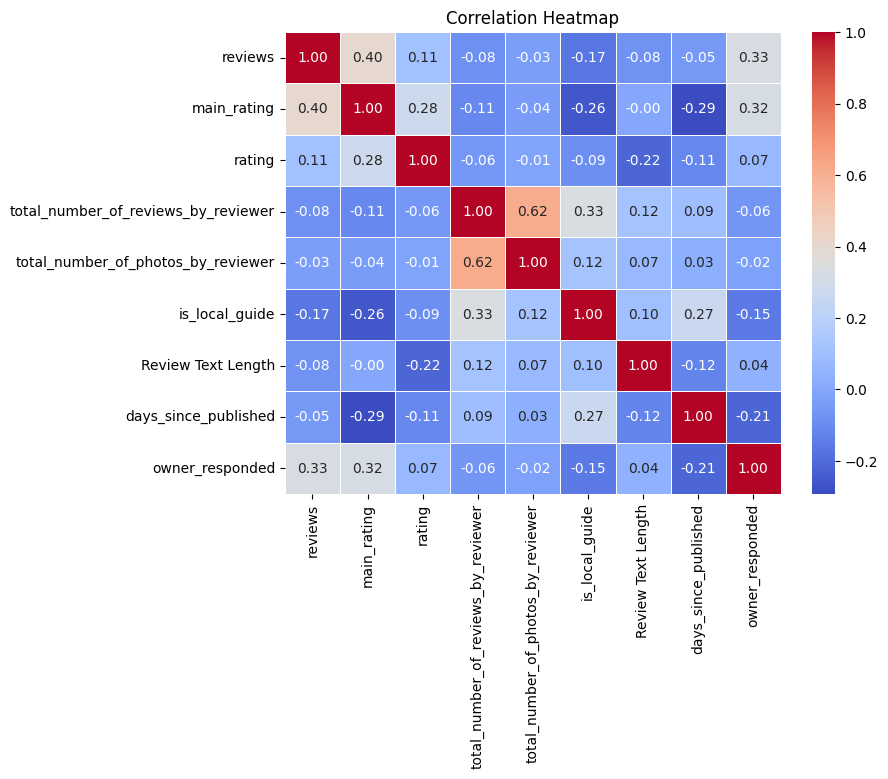

In [124]:
correlations = rest_review_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()